In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [3]:
from sklearn.datasets import load_iris
dataset = pd.read_csv("IRIS.csv")

In [4]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#dataset.head()
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#VISUALIZATION

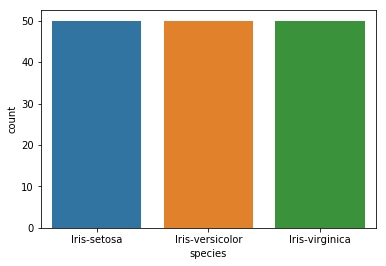

In [7]:
sb.countplot(x="species",data=dataset)

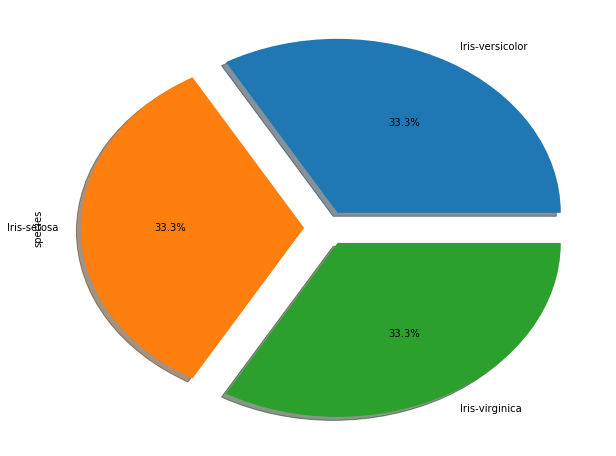

In [9]:
dataset['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))

In [10]:
#SCIKITLEARN KNN

In [11]:
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values



In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)
X_train.shape

(120, 4)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn=classifier.fit(X,y)

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
y_pred

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0])

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm


array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]], dtype=int64)

In [46]:
#MY KNN FROM HERE ONWARDS


In [47]:
#euclidean distance
def euclidean_dist(x1, x2):
    dist =0.0
    for i in range(len(x1)):
        dist += (x1[i] - x2[i])**2
    dist = math.sqrt(dist)
    return dist

In [48]:
y_pred_new =[]


y_train_new=list(y_train)
k=5
    
def knn_predict(x):
    
    class0=0
    class1=0
    class2=0
    dic1={}
    dic1_sorted={}
    l=[]
    d1=0
    
    for i in range(X_train.shape[0]):
        row2 =list( X_train[i])
        d1 = euclidean_dist(x, row2)
        dic1[d1]= y_train[i]
    
    dic1_sorted= sorted(dic1.items())
    
    for j in dic1_sorted:
        l.append(j[0])
        
    
    for i in range(k):
        
        if dic1[l[i]]==1:
            class1+=1
        elif dic1[l[i]]==0:
            class0+=1
        else:
            class2+=1
            
    if class0>=class1 and class0>=class2:
        return 0
    elif class1>=class0 and class1>=class2:
        return 1
    else:
        return 2
        

        



In [49]:
for j in X_test:
    a=knn_predict(list(j))
    y_pred_new.append(a)


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_new)
cm

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]], dtype=int64)

In [51]:
np.array(y_pred_new)


array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0])

In [52]:
X_test

array([[5.7, 2.8, 4.5, 1.3],
       [4.6, 3.6, 1. , 0.2],
       [5. , 3.4, 1.6, 0.4],
       [6.3, 3.3, 4.7, 1.6],
       [6.1, 2.6, 5.6, 1.4],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.3, 1.7, 0.5],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 3.4, 4.5, 1.6],
       [5.1, 3.7, 1.5, 0.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.4, 3.2, 5.3, 2.3],
       [5. , 2. , 3.5, 1. ],
       [5.8, 2.7, 4.1, 1. ],
       [6.5, 3. , 5.2, 2. ],
       [5.7, 2.5, 5. , 2. ],
       [5.6, 3. , 4.5, 1.5],
       [6.3, 2.7, 4.9, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3.7, 1.5, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 3. , 4.8, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.9, 1.3, 0.4],
       [6.7, 3.1, 5.6, 2.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.4, 1.5, 0.2]])

In [53]:
knn_predict([5.2, 3.1, 1.6, 0.31])

0

In [54]:
#NEURAL NETWORK FROM HERE

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\91930\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91930\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91930\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91930\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [56]:
net_classifier = Sequential()
net_classifier.add(Dense(output_dim=6, init= 'uniform', activation='relu', input_dim=4))
net_classifier.add(Dense(output_dim=6, init='uniform', activation='relu'))
net_classifier.add(Dense(output_dim=3, init='uniform', activation='softmax'))
net_classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\91930\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=6, kernel_initializer="uniform")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


C:\Users\91930\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91930\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [58]:
net_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r=net_classifier.fit(X_train, y_train, batch_size=5, epochs=50)


Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 0.6405 - acc: 0.6750
Epoch 2/50
120/120 [==============================] - 0s 516us/step - loss: 0.6160 - acc: 0.6833
Epoch 3/50
120/120 [==============================] - 0s 307us/step - loss: 0.5943 - acc: 0.6917
Epoch 4/50
120/120 [==============================] - 0s 391us/step - loss: 0.5724 - acc: 0.7000
Epoch 5/50
120/120 [==============================] - 0s 357us/step - loss: 0.5533 - acc: 0.7167
Epoch 6/50
120/120 [==============================] - 0s 399us/step - loss: 0.5339 - acc: 0.7167
Epoch 7/50
120/120 [==============================] - 0s 357us/step - loss: 0.5187 - acc: 0.7667
Epoch 8/50
120/120 [==============================] - 0s 249us/step - loss: 0.5030 - acc: 0.7333
Epoch 9/50
120/120 [==============================] - 0s 266us/step - loss: 0.4873 - acc: 0.7750
Epoch 10/50
120/120 [==============================] - 0s 349us/step - loss: 0.4759 - acc: 0.8833
Epoch 11/50
120/120 [==========

KeyError: 'val_loss'

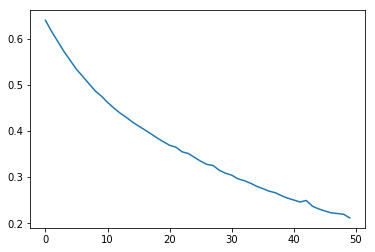

In [59]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



KeyError: 'val_acc'

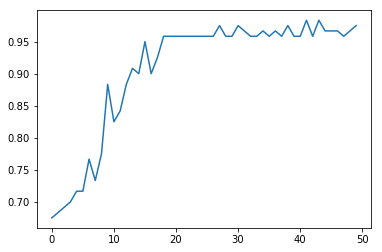

In [60]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [61]:
y_pred_net=net_classifier.predict(X_test)

In [62]:
y_pred_net
y_pred_net =(y_pred_net>0.5)

In [63]:
y_pred_net1=[]

for i in y_pred_net:
    for j in range(3):
        if i[j]==True:
            y_pred_net1.append(j)
np.array(y_pred_net1)
            

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0])

In [64]:
from sklearn.metrics import confusion_matrix
cm_net = confusion_matrix(y_test, y_pred_net1)
cm_net

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]], dtype=int64)

In [65]:

a=[5.2, 3.1, 1.6, 0.31]
a=np.array(a)
a.shape


(4,)

In [66]:
net_classifier.predict(a)

ValueError: Error when checking input: expected dense_1_input to have shape (4,) but got array with shape (1,)

In [118]:
#KERNEL SVM here onwards

In [75]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', random_state=32)
svm=classifier_svm.fit(X_train, y_train)

C:\Users\91930\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [76]:
y_pred_svm = classifier_svm.predict(X_test)
y_pred_svm

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0])

In [77]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]], dtype=int64)

In [73]:
import joblib
joblib.dump(knn, "knn_iris.pkl")


['knn_iris.pkl']

In [74]:
joblib.dump(r, "knn_iris_net.pkl")

['knn_iris_net.pkl']

In [79]:
joblib.dump(svm, "knn_iris_svm.pkl")

['knn_iris_svm.pkl']